In [1]:
from function import (
    generate_random_graph,
    random_probability_vector,
    simulate_many_runs,
)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1001,) + inhomogeneous part.

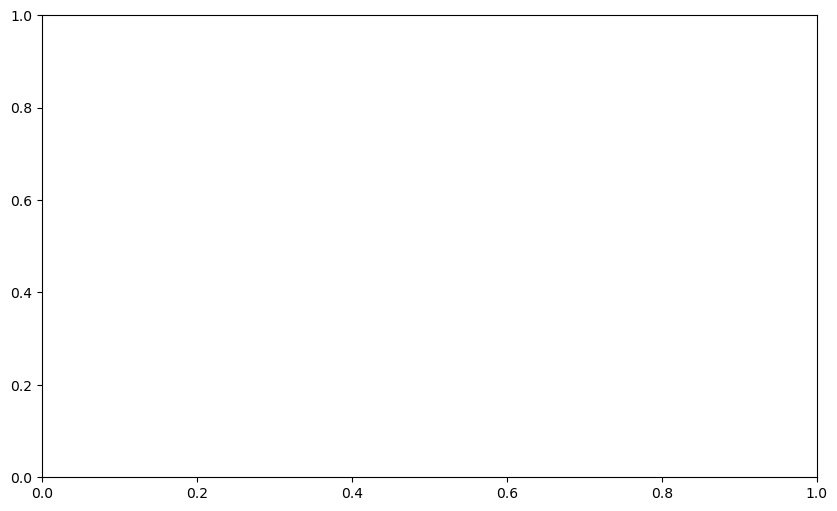

In [ ]:
import matplotlib.pyplot as plt
import random

def generate_random_graph(A_size, I_size, edge_prob):
    """
    neighbors[i] = list of advertisers a that impression type i can connect to.
    Each edge (a, i) is included independently with probability edge_prob.
    """
    neighbors = []
    for i in range(I_size):
        neigh_i = [a for a in range(A_size) if random.random() < edge_prob]
        if not neigh_i:  # avoid isolated types if you want
            neigh_i = [random.randrange(A_size)]
        neighbors.append(neigh_i)
    return neighbors

def random_probability_vector(I_size):
    """Random probability vector over impression types 0..I_size-1."""
    raw = [random.random() for _ in range(I_size)]
    s = sum(raw)
    return [x / s for x in raw]

def simulate_random_graphs(
    num_graphs,
    A_size,
    I_size,
    edge_prob,
    T,
    num_runs_per_graph=20,
):
    """
    For num_graphs random graphs, compute the average ALG/OPT ratio
    using simulate_many_runs().
    """
    avg_ratios = []
    for _ in range(num_graphs):
        neighbors = generate_random_graph(A_size, I_size, edge_prob)
        p = random_probability_vector(I_size)

        # simulate_many_runs returns (avg_ratio, ratios_list)
        avg_ratio, _ = simulate_many_runs(
            A_size, I_size, neighbors, p, T, num_runs=num_runs_per_graph
        )

        avg_ratios.append(avg_ratio)

    return avg_ratios

# ===== run experiment and plot =====

A_size = 20       # number of advertisers
I_size = 10       # number of impression types
edge_prob = 0.3   # edge probability in G(A, I, E)
T = 50            # number of arriving customers
num_graphs = 50   # how many random graphs to simulate
num_runs_per_graph = 5

ratios = simulate_random_graphs(
    num_graphs,
    A_size,
    I_size,
    edge_prob,
    T,
    num_runs_per_graph=num_runs_per_graph,
)

print("Average ratio over all random graphs:", sum(ratios) / len(ratios))

plt.figure()
plt.hist(ratios, bins=10)
plt.xlabel("ALG/OPT ratio (per random graph)")
plt.ylabel("Count of graphs")
plt.title("Distribution of ALG/OPT ratio over random graphs")
plt.tight_layout()
plt.show()# ===== run experiment and scatter plot =====

A_size = 20
I_size = 10
edge_prob = 0.3
T = 50
num_graphs = 50
num_runs_per_graph = 30

ratios = simulate_random_graphs(
    num_graphs,
    A_size,
    I_size,
    edge_prob,
    T,
    num_runs_per_graph=num_runs_per_graph,
)

print("Average ratio over all random graphs:", sum(ratios) / len(ratios))

# ----------- SCATTER PLOT -----------
plt.figure()
plt.scatter(range(len(ratios)), ratios, s=40)
plt.xlabel("Graph index")
plt.ylabel("ALG/OPT ratio")
plt.title("Scatter plot of ratios across random graphs")
plt.tight_layout()
plt.show()

